In [1]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('day-r5.2.csv.gz')
# removed_cols = ['user','day','week','starttime','endtime','sessionid']
removed_cols = ['user','week','sessionid','starttime', 'endtime']
x_cols = [i for i in data.columns if i not in removed_cols]

In [7]:
data_1 = data[x_cols]

In [8]:
data_1

,day,isweekday,isweekend,project,role,b_unit,f_unit,dept,team,ITAdmin,...,afterhourhttp_n_hackf,afterhourhttp_hackf_mean_url_len,afterhourhttp_hackf_mean_url_depth,afterhourhttp_hackf_mean_http_c_len,afterhourhttp_hackf_mean_http_c_nwords,afterhourhttp_hackf_n-pc0,afterhourhttp_hackf_n-pc1,afterhourhttp_hackf_n-pc2,afterhourhttp_hackf_n-pc3,insider
0,5,0,1,56,19,0,1,10,37,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,5,0,1,56,28,0,2,12,39,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,5,0,1,56,28,0,2,12,35,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,5,0,1,56,16,1,0,22,17,1,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,5,0,1,56,32,1,4,11,33,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693644,520,1,0,56,39,0,2,12,22,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
693645,519,1,0,56,32,0,4,11,27,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
693646,520,1,0,56,32,0,4,11,27,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
693647,519,1,0,56,9,0,1,18,38,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [9]:
features = data_1.drop(labels = 'insider', axis=1)

In [10]:
target = data_1["insider"]

In [11]:
targetBin = target > 0

In [12]:
targetBin

0         False
1         False
2         False
3         False
4         False
          ...  
693644    False
693645    False
693646    False
693647    False
693648    False
Name: insider, Length: 693649, dtype: bool

[3.89848522e-03 4.69535960e-04 4.97874727e-04 1.95060319e-03
 3.09230542e-03 2.75988741e-03 3.51193206e-03 3.38269162e-03
 3.79442378e-03 3.87011824e-03 5.32195363e-03 3.93122247e-03
 4.67914055e-03 4.66233143e-03 4.83017249e-03 3.51106231e-03
 3.21903608e-03 2.72445221e-04 9.27092846e-04 6.89029137e-04
 3.25972279e-03 3.30196135e-03 3.83781753e-04 2.55278522e-03
 0.00000000e+00 2.15380360e-03 2.46965344e-03 6.34094912e-05
 4.74439553e-04 4.98889642e-04 3.49747966e-03 4.12026257e-03
 3.66206144e-04 9.86491680e-04 7.18673622e-04 2.84619535e-03
 2.99033435e-03 3.03213707e-04 1.06749441e-03 0.00000000e+00
 1.10085318e-03 1.03711930e-03 1.10467493e-04 8.58418304e-04
 1.00563935e-03 1.61146932e-02 1.91941598e-02 1.35828638e-02
 9.35332197e-03 0.00000000e+00 7.99593759e-04 1.28954183e-04
 8.98086373e-03 9.79688203e-03 5.44732966e-03 1.08815855e-02
 0.00000000e+00 7.04299549e-04 0.00000000e+00 1.46385223e-03
 3.53482460e-03 2.69452014e-03 1.03159896e-03 0.00000000e+00
 6.16711235e-04 2.662037

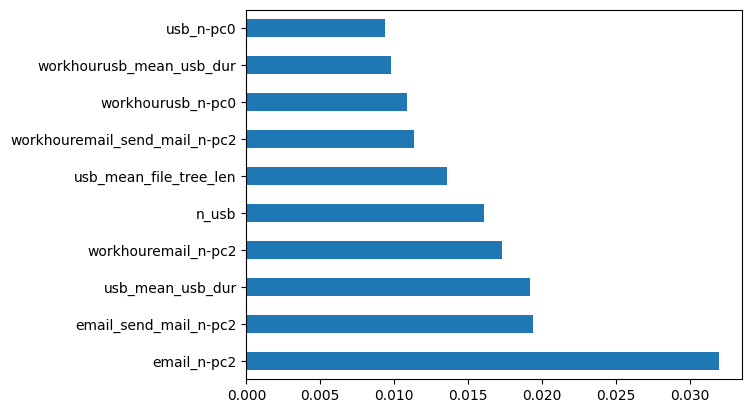

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(features, targetBin)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

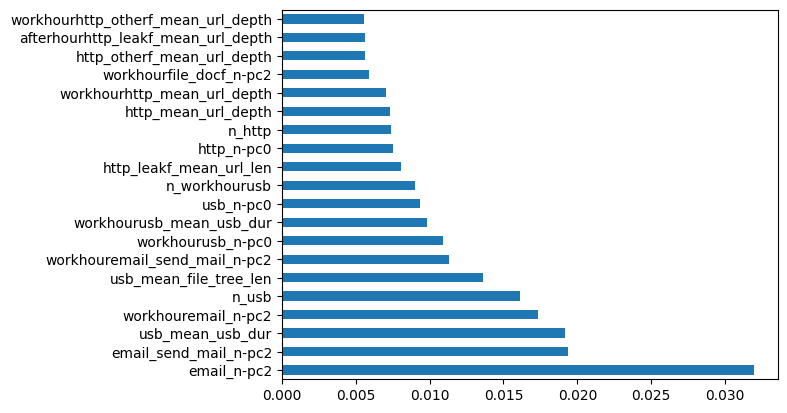

In [14]:
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

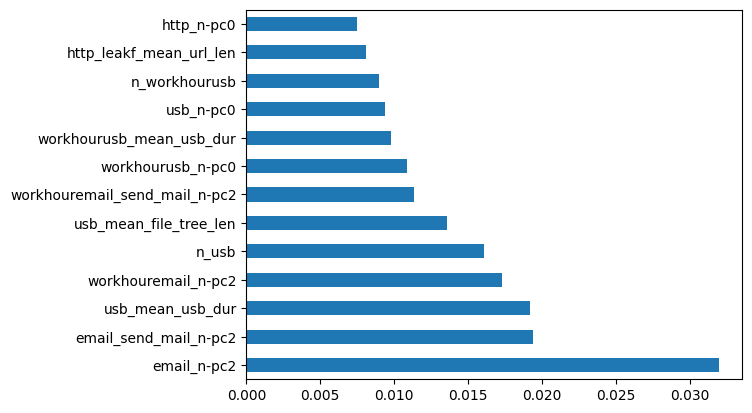

In [15]:
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [16]:
best_features = list(feat_importances.nlargest(13).index)
best_features.append('day')

In [17]:
best_features

['email_n-pc2',
 'email_send_mail_n-pc2',
 'usb_mean_usb_dur',
 'workhouremail_n-pc2',
 'n_usb',
 'usb_mean_file_tree_len',
 'workhouremail_send_mail_n-pc2',
 'workhourusb_n-pc0',
 'workhourusb_mean_usb_dur',
 'usb_n-pc0',
 'n_workhourusb',
 'http_leakf_mean_url_len',
 'http_n-pc0',
 'day']

In [14]:
# best_features = ['day','email_send_mail_n-pc2', 'email_n-pc2', 'workhouremail_n-pc2', 'usb_mean_usb_dur', 'n_usb', 'workhouremail_send_mail_n-pc2', 'usb_mean_file_tree_len', 'usb_n-pc0', 'workhourusb_n-pc0', 'n_workhourusb', 'http_n-pc0', 'n_http', 'http_mean_url_depth']

In [18]:
best_features.append("insider")

In [19]:
print(best_features)

['email_n-pc2', 'email_send_mail_n-pc2', 'usb_mean_usb_dur', 'workhouremail_n-pc2', 'n_usb', 'usb_mean_file_tree_len', 'workhouremail_send_mail_n-pc2', 'workhourusb_n-pc0', 'workhourusb_mean_usb_dur', 'usb_n-pc0', 'n_workhourusb', 'http_leakf_mean_url_len', 'http_n-pc0', 'day', 'insider']


In [20]:
best_features_dataset = data[best_features]

In [21]:
best_features_dataset.to_csv("best_features_dataset.csv", index=False)